<center><h1> DATA SCIENCE

<center><h3>Lab-4

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
DS = pd.read_csv("Titanic_Dataset.csv")
DS.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
DS.shape

(891, 12)

In [83]:
DS.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3>Handling of Missing Values

In [84]:
Missing_values_count=print(DS.isnull().sum())
Missing_values_count

print("\n")
null_values=[features for features in DS.columns if DS[features].isnull().sum()>1]
for feature in null_values:
    print(feature)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Age
Cabin
Embarked


<h4>1. For Numerical Variables

In [85]:
# numerical variables containing missing values

num_null_values=[feature for feature in DS.columns if DS[feature].isnull().sum()>1 and DS[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in num_null_values:
    print("{}: {}% missing value".format(feature,np.around(DS[feature].isnull().mean(),3)))

Age: 0.199% missing value


In [86]:
# Replacing num_null_values

for feature in num_null_values:
    median_value=DS[feature].median()

    DS[feature+'nan']=np.where(DS[feature].isnull(),1,0)
    DS[feature].fillna(median_value,inplace=True)
    
DS[num_null_values].isnull().sum()

Age    0
dtype: int64

In [87]:
DS.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agenan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


<h4>2. For Categorical Variables

In [93]:
# categorical variables containing missing values
cat_null_values=[feature for feature in DS.columns if DS[feature].isnull().sum()>1 and DS[feature].dtypes=='O']

for feature in cat_null_values:
    print("{}: {}% missing values".format(feature,np.round(DS[feature].isnull().mean(),3)))

Cabin: 0.771% missing values
Embarked: 0.002% missing values


In [89]:
# Replace missing value with a new label

def replace_cat_values(DS,cat_null_values):
    data=DS.copy()
    data[cat_null_values]=data[cat_null_values].fillna('NULL')
    return data

DS=replace_cat_values(DS,cat_null_values)

DS[cat_null_values].isnull().sum()

Cabin       0
Embarked    0
dtype: int64

In [90]:
DS.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agenan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NULL,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NULL,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NULL,S,0


<b>we can observe the missing values in the data set present in the columns where Age is numerical variable, Cabin and Embarked are categorical variable. We have handle the missing values and replace it with some other values in place of null value. 

<h3>Handling of Outliers at least for 1 variable.

In [94]:
numerical_variables = [feature for feature in DS.columns if DS[feature].dtypes != 'O']
print('Number of Numerical Variables: ', len(numerical_variables))

discrete_variables=[feature for feature in numerical_variables if len(DS[feature].unique())<10]
print("Discrete Variables Count: {}".format(len(discrete_variables)))

continuous_variables=[feature for feature in numerical_variables if feature not in discrete_variables]
print("Continuous Variables Count: {}".format(len(continuous_variables)))

Number of Numerical Variables:  7
Discrete Variables Count: 4
Continuous Variables Count: 3


In [95]:
print(continuous_variables)
DS[continuous_variables].head()

['PassengerId', 'Age', 'Fare']


,PassengerId,Age,Fare
0,1,22.0,7.2500
1,2,38.0,71.2833
2,3,26.0,7.9250
3,4,35.0,53.1000
4,5,35.0,8.0500


C:\Users\Rishab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

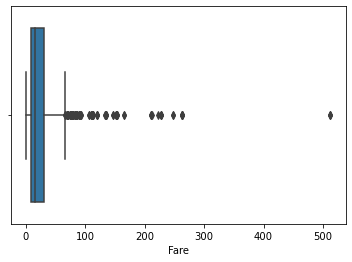

In [96]:
sns.boxplot(DS['Fare'])

In [97]:
outlier=np.where(DS['Age']>66)
print(outlier)

(array([ 96, 116, 493, 630, 672, 745, 851], dtype=int64),)


In [98]:
import numpy as np
Q1 = np.quantile(DS['Fare'],0.25)
print("Q1 = ",Q1)
Q3 = np.quantile(DS['Fare'],0.75)
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)

# For finding out the Outlier using IQR we have to define a multiplier which is 1.5

print("\nRange of Outliers:")
Q1=Q1 - 1.5*IQR 
print("Min_Value = ",Q1)
Q3=Q3 + 1.5*IQR
print("Max_Value = ",Q3)

Q1 =  7.9104
Q3 =  31.0
IQR =  23.0896

Range of Outliers:
Min_Value =  -26.724
Max_Value =  65.6344


<b>Hence, any value below Min_Value or Max_Value will be considered as an Outlier

<h3> Handling of Rare Variables

In [99]:
cat_rare_variables=[feature for feature in DS.columns if DS[feature].dtype=='O']
cat_rare_variables

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [100]:
DS.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:

for feature in cat_rare_variables:
    temp=DS.groupby(feature)['Fare'].count()/len(DS)
    temp_df=temp[temp>0.01].index
    DS[feature]=np.where(DS[feature].isin(temp_df),DS[feature],'Rare_var')

In [102]:
DS.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Rare_var,male,22.0,1,0,Rare_var,7.2500,Rare_var,S
1,2,1,1,Rare_var,female,38.0,1,0,Rare_var,71.2833,Rare_var,C
2,3,1,3,Rare_var,female,26.0,0,0,Rare_var,7.9250,Rare_var,S
3,4,1,1,Rare_var,female,35.0,1,0,Rare_var,53.1000,Rare_var,S
4,5,0,3,Rare_var,male,35.0,0,0,Rare_var,8.0500,Rare_var,S


In [103]:
for feature in cat_rare_variables:
    labels_ordered=DS.groupby([feature])['Fare'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    DS[feature]=DS[feature].map(labels_ordered)

In [104]:
DS.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,0,22.0,1,0,0,7.2500,0,1
1,2,1,1,0,1,38.0,1,0,0,71.2833,0,2
2,3,1,3,0,1,26.0,0,0,0,7.9250,0,1
3,4,1,1,0,1,35.0,1,0,0,53.1000,0,1
4,5,0,3,0,0,35.0,0,0,0,8.0500,0,1


NAME: **Rishab Jha**

*PRN*: **20190802072**